In [1]:
%pip install sqlalchemy networkx matplotlib

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/38/e9/5f72929373e1a0e8d142a130f3f97e6ff920070f87f91c4e13e40e0fba5a/networkx-3.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 435.7 kB/s eta 0:00:04
   ------- -------------------------------- 0.3/1.7 MB 2.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.5/1.7 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pyodbc
import networkx as nx
import matplotlib.pyplot as plt

def generate_erd(connection_string, tables_of_interest):
    # Connect to the database
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()
    
    # Create a graph
    G = nx.Graph()
    
    # Add nodes (tables) to the graph
    for table in tables_of_interest:
        G.add_node(table)
    
    # Function to get foreign keys for a table
    def get_foreign_keys(table_name):
        query = f"""
        SELECT 
            OBJECT_NAME(f.parent_object_id) AS TableName,
            COL_NAME(fc.parent_object_id, fc.parent_column_id) AS ColumnName,
            OBJECT_NAME (f.referenced_object_id) AS ReferenceTableName,
            COL_NAME(fc.referenced_object_id, fc.referenced_column_id) AS ReferenceColumnName
        FROM 
            sys.foreign_keys AS f
        INNER JOIN 
            sys.foreign_key_columns AS fc 
                ON f.OBJECT_ID = fc.constraint_object_id
        WHERE 
            OBJECT_NAME(f.parent_object_id) = ?
        """
        cursor.execute(query, table_name)
        return cursor.fetchall()
    
    # Add edges (relationships) to the graph
    for table in tables_of_interest:
        fks = get_foreign_keys(table)
        for fk in fks:
            if fk.ReferenceTableName in tables_of_interest:
                G.add_edge(fk.TableName, fk.ReferenceTableName)
    
    # Close the database connection
    conn.close()
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=10, font_weight='bold')
    
    # Add edge labels
    edge_labels = {(u, v): '' for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Entity Relationship Diagram")
    plt.axis('off')
    plt.tight_layout()
    plt.show()




In [3]:
# Store credentials - sql
server = 'qfr-cts07'
database = 'RDB_MAIN2223'
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

In [ ]:
[RDB_MAIN2223].[rdowner].[V_POS]
[RDB_MAIN2223].[rdowner].[V_STUDENTSET]
[RDB_MAIN2223].[rdowner].[V_ACTIVITY_STUDENTSET]
[RDB_MAIN2223].[rdowner].[V_ACTIVITY]
[RDB_MAIN2223].[rdowner].[V_ACTIVITY_LOCATION] 
[RDB_MAIN2223].[rdowner].[V_ACTIVITY_MODULE]
[RDB_MAIN2223].[rdowner].[V_ACTIVITY_STAFF]
[RDB_MAIN2223].[rdowner].[V_STAFF]
[RDB_MAIN2223].[rdowner].[V_ACTIVITY_DATETIME] 
[RDB_MAIN2223].[rdowner].[V_STUDENTSET_MODULE]
[RDB_MAIN2223].[rdowner].[V_MODULE]
 [RDB_MAIN2223].[rdowner].[V_LOCATION]
 [RDB_MAIN2223].[rdowner].[V_POS_MODULE]
 [RDB_MAIN2223].[rdowner].[V_ACTIVITYTYPE]


C:\Users\pho-lovehagen\AppData\Local\Temp\ipykernel_29272\1812282314.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


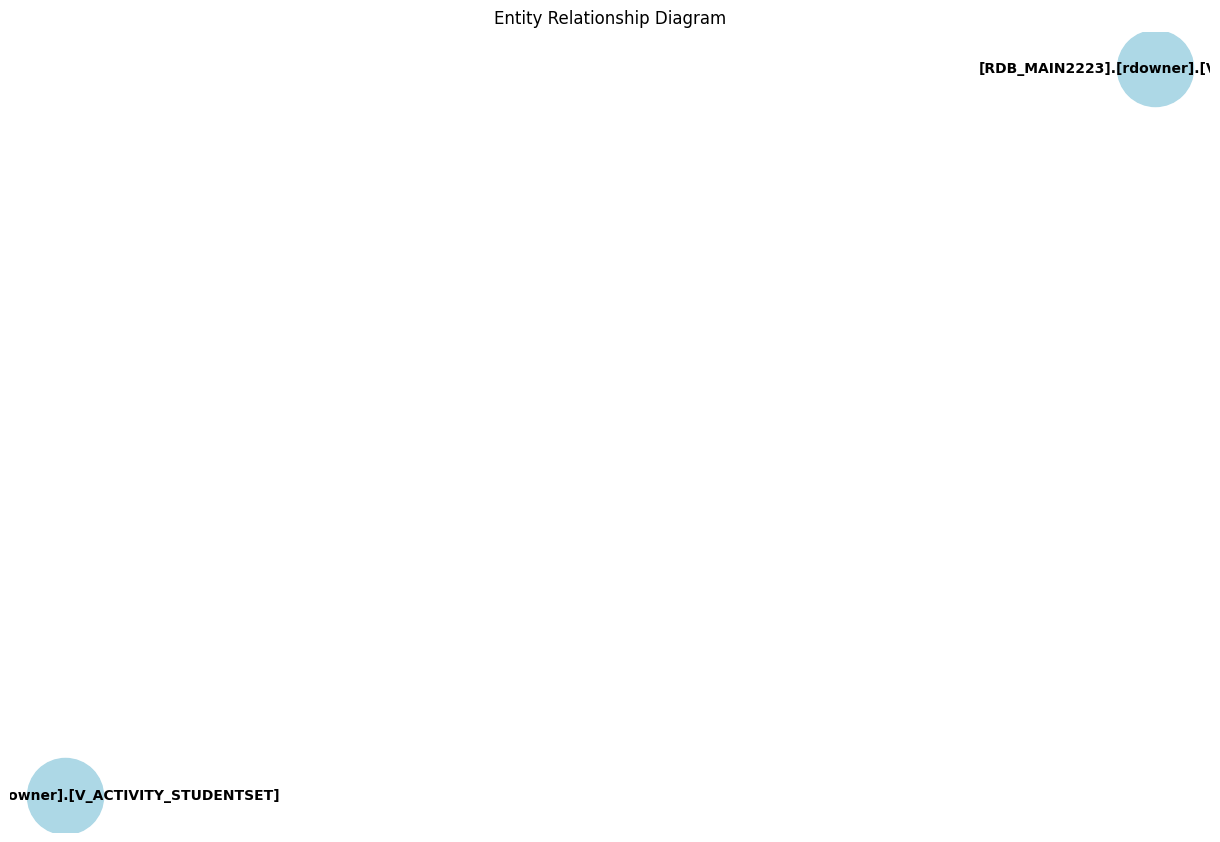

In [6]:


# Usage
connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER=qfr-cts07;DATABASE=RDB_MAIN2223;Trusted_Connection=yes;"
tables_of_interest = ['[RDB_MAIN2223].[rdowner].[V_STUDENTSET]',
'[RDB_MAIN2223].[rdowner].[V_ACTIVITY_STUDENTSET]']
generate_erd(connection_string, tables_of_interest)